# <font color = "blue">Проект "Аналитика в Яндекс.Афише"</font>

## Описание проекта
Необходимо помочь маркетологам отдела аналитики Яндекс.Афиши оптимизировать маркетинговые затраты.  
Данные для анализа - данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.  

Нужно изучить:
* как люди пользуются продуктом,
* когда они начинают покупать,
* сколько денег приносит каждый клиент
* когда клиент окупается.

## Описание данных

Таблица <b>visits </b>(лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь  

Таблица <b>orders</b> (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа  

Таблица <b>costs</b> (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

## 1. Загрузка данных и подготовка их к анализу

In [4]:
# Загрузим данные
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

In [5]:
def main_info(df):
    '''Функция для просмотра общей информации о датафрейме'''
    print ('\033[1m' + 'Инфо' + '\033[0m')
    display(df.info())
    print ('\033[1m' + 'Описание' + '\033[0m')
    display(df.describe())
    print ('\033[1m' + 'Первые 10 строк' + '\033[0m')
    display(df.head(10))

In [6]:
visits.pipe(main_info)

Инфо
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

Описание


,Source Id,Uid
count,359400.00,359400.00
mean,3.75,9202556994354921472.00
std,1.92,5298432824659611648.00
min,1.00,11863502262781.00
25%,3.00,4613406732167550976.00
50%,4.00,9227412908740601856.00
75%,5.00,13728237011236171776.00
max,10.00,18446676030785673216.00


Первые 10 строк


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [5]:
orders.pipe(main_info)

Инфо
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

Описание


,Revenue,Uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00


Первые 10 строк


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [6]:
costs.pipe(main_info)

Инфо
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

Описание


,source_id,costs
count,2542.00,2542.00
mean,4.86,129.48
std,3.18,156.30
min,1.00,0.54
25%,2.00,21.95
50%,4.00,77.30
75%,9.00,170.06
max,10.00,1788.28


Первые 10 строк


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Приведем названия столбцов к нижнему регистру. Изменим тип данных в столбцах с датами.
Переименуем столбец 'buy ts' в 'buy_ts' - так корректнее и понятно, что это единое название

In [7]:
def lower_columns(df):
    '''Функция для приведения названий столбцов к нижнему регистру'''
    df.columns=df.columns.str.lower().str.replace(' ', '_')
    
visits.pipe(lower_columns)
orders.pipe(lower_columns)
costs.pipe(lower_columns)


# Меняем тип данных для столбцов с датами
## В датафрейме visits
for column in ['end_ts','start_ts']:
    visits[column]= pd.to_datetime(visits[column], format = '%Y-%m-%d')
## В датафрейме orders    
orders['buy_ts']= pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d')  

display('visits')
visits.info()
display('orders')
orders.info()
display('costs')
costs.info()

'visits'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


'orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


'costs'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Вывод: привели данные к нужным типам, подготовили для дальнейшей работы

## 2. Построение отчетов и расчет метрик

### 2.1 Продукт

<b> Посмотрим, сколько людей пользуются в день, неделю, месяц?</b> 

In [8]:
# Определим дату, неделю, месяц и год сессии
visits['session_date'] = pd.to_datetime(visits['start_ts']).dt.date
visits['session_week'] = visits['start_ts'].astype('datetime64[W]') #первый день недели
visits['session_month'] = visits['start_ts'].astype('datetime64[M]') # первый день месяца
visits['session_year'] = visits['start_ts'].dt.year


# Распределение метрик во времени - группируем по дате
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
mau = visits.groupby(['session_year','session_month']).agg({'uid':'nunique'})

# Средние значения метрик
dau_total = dau.mean()
wau_total = wau.mean()
mau_total = mau.mean()

display('Пользователей:', 'в день', round(dau_total.values[0]),
        'в неделю:', round(wau_total.values[0]), 
        'в месяц:', round(mau_total).values[0])


'Пользователей:'

'в день'

908.0

'в неделю:'

5622.0

'в месяц:'

23228.0

Вывод: среднее число пользователей: в день - 908, в неделю - 5622, в месяц - 23228.

<Figure size 432x288 with 0 Axes>

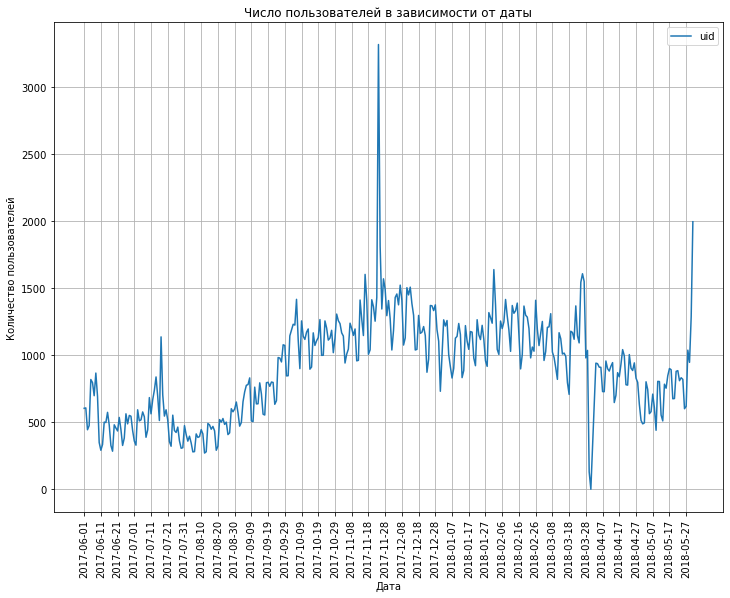

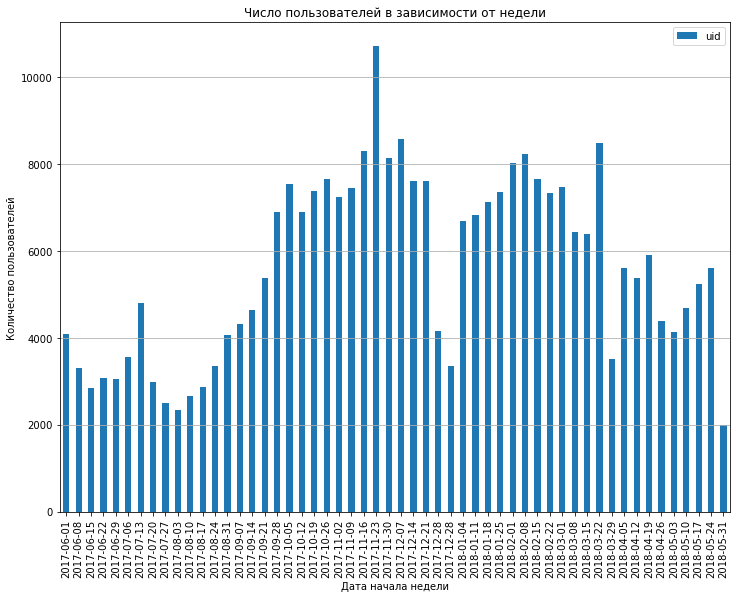

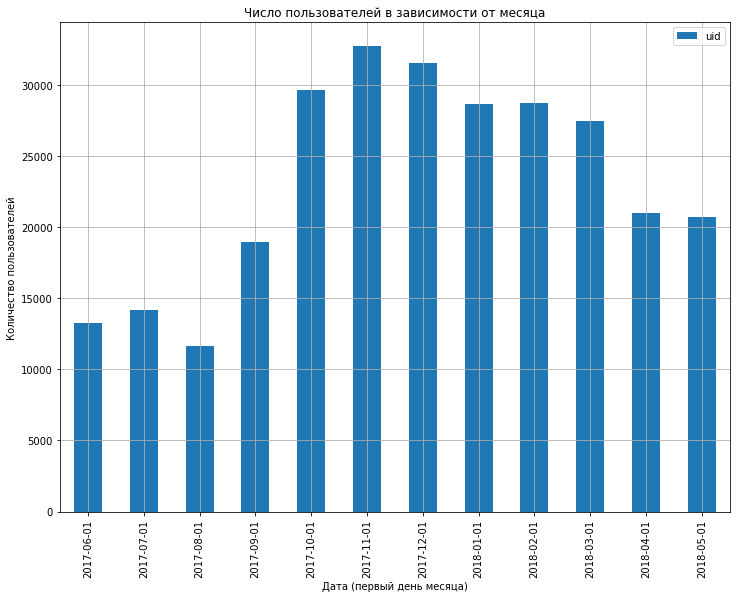

In [9]:
# Построим графики распределения пользователей по времени
plt.figure()

# Пользователи по дням
ax1 = dau.reset_index().plot.line(x = 'session_date', y = 'uid', figsize = (12,9))
ax1.grid()
plt.title('Число пользователей в зависимости от даты')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')
plt.xticks(
np.arange(pd.to_datetime('2017-06-01'), pd.to_datetime('2018-05-31'), pd.to_timedelta('10 days'))
)
plt.xticks(rotation= 90)

# Пользователи по неделям
wau = wau.reset_index()
wau['session_week'] = wau['session_week'].dt.date# Убираем время для удобного представления даты на графике
ax2 = wau.plot.bar(x = 'session_week', y = 'uid', figsize = (12,9))
ax2.grid(axis = 'y')
plt.title('Число пользователей в зависимости от недели')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата начала недели')

# Пользователи по месяцам
mau = mau.reset_index()
mau['session_month'] = mau['session_month'].dt.date# Убираем время для удобного представления даты на графике
ax3 = mau.reset_index().plot.bar(x = 'session_month', y = 'uid', figsize = (12,9))
ax3.grid()
plt.title('Число пользователей в зависимости от месяца')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата (первый день месяца)')
plt.show()

Вывод: наблюдается некоторая сезонность по количеству пользователей - можно отметить пики максимума посещений в ноябре, декабре и октябре, а минимум - в летний период - август, июнь, июль.

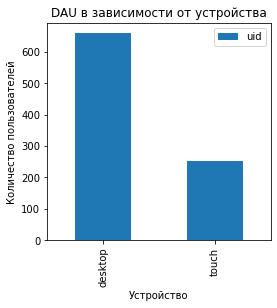

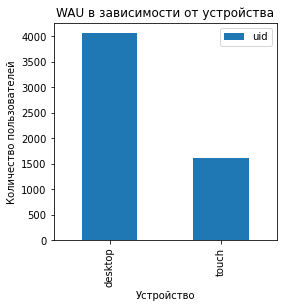

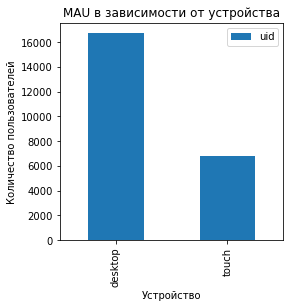

In [10]:
# Распределение метрик по устройствам
dau = visits.groupby(['device','session_date']).agg({'uid': 'nunique'}).reset_index().groupby('device').agg({'uid':'mean'})
wau = visits.groupby(['device','session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index().groupby('device').agg({'uid':'mean'})
mau = visits.groupby(['device','session_year','session_month']).agg({'uid':'nunique'}).reset_index().groupby('device').agg({'uid':'mean'})


ax1 = dau.reset_index().plot.bar(x = 'device', y = 'uid', figsize = (4,4))
plt.title('DAU в зависимости от устройства')
plt.ylabel('Количество пользователей')
plt.xlabel('Устройство')

ax2 = wau.reset_index().plot.bar(x = 'device', y = 'uid', figsize = (4,4))
plt.title('WAU в зависимости от устройства')
plt.ylabel('Количество пользователей')
plt.xlabel('Устройство')


ax3 = mau.reset_index().plot.bar(x = 'device', y = 'uid', figsize = (4,4))
plt.title('MAU в зависимости от устройства')
plt.ylabel('Количество пользователей')
plt.xlabel('Устройство')
plt.show()

Вывод: по всем временным метрикам количество пользователей с desktop более, чем в 2 раза превышает количество пользователей с touch.

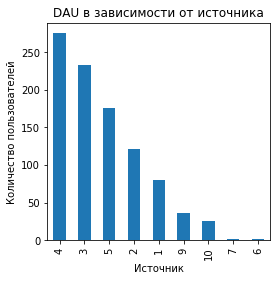

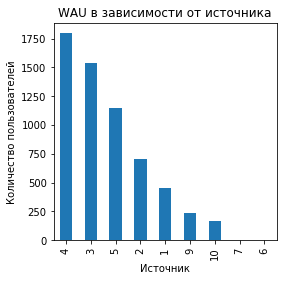

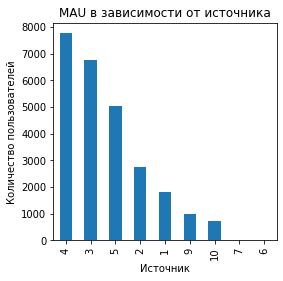

In [11]:
# Распределение метрик по источникам
dau = visits.groupby(['source_id','session_date']).agg({'uid': 'nunique'}).\
    reset_index().groupby('source_id').agg({'uid':'mean'})

wau = visits.groupby(['source_id','session_year', 'session_week']).\
    agg({'uid': 'nunique'}).reset_index().groupby('source_id').agg({'uid':'mean'})

mau = visits.groupby(['source_id','session_year','session_month']).\
    agg({'uid':'nunique'}).reset_index().groupby('source_id').agg({'uid':'mean'})


ax1 = dau.reset_index().sort_values(by = 'uid', ascending = False).plot.bar(
    x = 'source_id', y = 'uid', figsize = (4,4), legend = None)
plt.title('DAU в зависимости от источника')
plt.ylabel('Количество пользователей')
plt.xlabel('Источник')

ax2 = wau.reset_index().sort_values(by = 'uid', ascending = False).plot.bar(
    x = 'source_id', y = 'uid', figsize = (4,4),legend = None)
plt.title('WAU в зависимости от источника')
plt.ylabel('Количество пользователей')
plt.xlabel('Источник')


ax3 = mau.reset_index().sort_values(by = 'uid', ascending = False).plot.bar(
    x = 'source_id', y = 'uid', figsize = (4,4), legend = None)

plt.title('MAU в зависимости от источника')
plt.ylabel('Количество пользователей')
plt.xlabel('Источник')
plt.show()

In [11]:
# Просмотрим средние значения MAU по источникам
display(mau.sort_values(by = 'uid', ascending = False))

,uid
device,
desktop,16724.92
touch,6825.92


Вывод: наибольшее число пользователей привлекаются с источников 4, 3, 5, а наименьшее - с 6, 7, 10, 9.

<b>Сколько сессий в день?</b>

In [12]:
# Сгруппируем сессии по дате и подсчитаем число сессий и число пользователей
sessions_per_user = visits.groupby('session_date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
# Число сессий одного пользователя в день 
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
display(sessions_per_user)

# Среднее значение метрики
sessions_per_day_mean = round(visits.groupby('session_date').agg({'uid': 'count'}).mean()/dau_total,2)
display('Среднее число сессий в день:', sessions_per_day_mean.values[0])

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.10
2017-06-02,658,608,1.08
2017-06-03,477,445,1.07
2017-06-04,510,476,1.07
2017-06-05,893,820,1.09
...,...,...,...
2018-05-27,672,620,1.08
2018-05-28,1156,1039,1.11
2018-05-29,1035,948,1.09


'Среднее число сессий в день:'

1.09

Вывод: пользователь совершает в среднем одну сессию в день

<b>Сколько длится одна сессия (ASL)?</b>

Мода 60.0
Среднее 643.03
Медиана 300.0


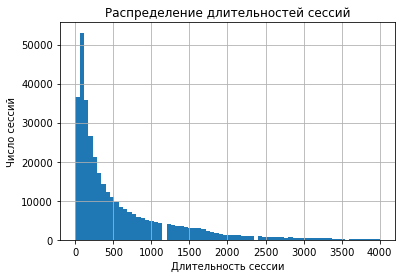

In [18]:
# Добавим столбец с длительностью сессии
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
visits['session_duration_sec'].hist(bins = 70, range = (0,4000))
plt.title('Распределение длительностей сессий')
plt.xlabel('Длительность сессии')
plt.ylabel('Число сессий')

# Посчитаем моду:
print('Мода', round(visits['session_duration_sec'].mode().values[0],2))
print('Среднее', round(visits['session_duration_sec'].mean(),2))
print('Медиана', round(visits['session_duration_sec'].median(),2))

Вывод: Видно, что распределение существенно отличается от нормального, в основном длительности сессий сильно смещены к нулевому значению. Среднее арифметическое длительности сессии составляет 643 с, медиана - 300 с, мода - 60 с. 

<b> Исследуем, как часто люди возвращаются</b>

In [19]:
# Дата первой сессии для каждого пользователя
first_session_date = visits.groupby('uid')['session_date'].min()
first_session_date.name = 'first_session_date'

# Соединим с таблицей visits
visits = visits.join(first_session_date, on='uid')

In [20]:
# Определим месяц первой сессии
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')

# Определим время жизни когорты в месяцах
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

#Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый месяц
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [21]:
#Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждую следующую неделю.
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]

#Переименуем столбец user_id в cohort_users
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_session_month')

In [22]:
# Наконец, рассчитаем Retention Rate. 
# Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

# Построим сводную таблицу:
retention_pivot = cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot = retention_pivot.fillna(0)
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")


6.52

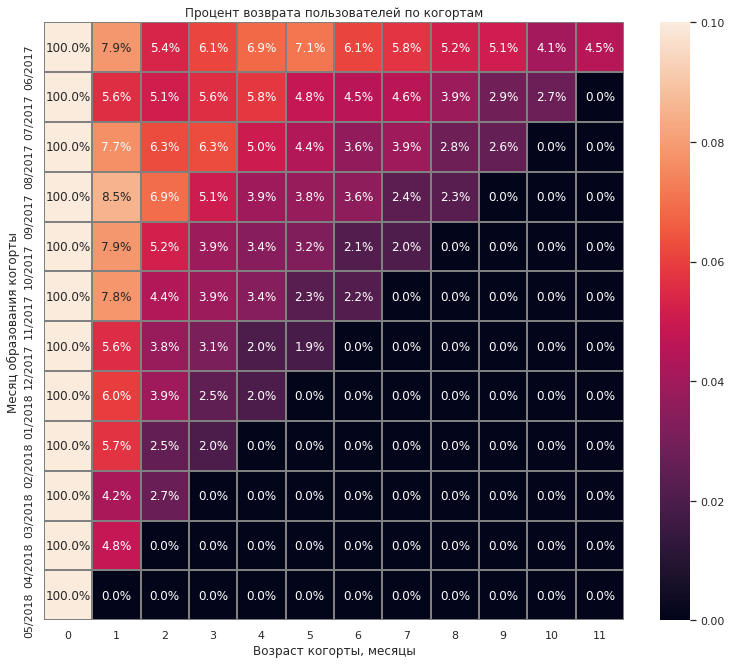

In [19]:
# Создадим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 11))
plt.title('Процент возврата пользователей по когортам')

sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax = 0.1);
plt.xlabel('Возраст когорты, месяцы')
plt.ylabel('Месяц образования когорты')

# Расчет среднего значения метрики произведем по второму месяцу (период, следующий за нулевым)
cohorts_mean = cohorts[cohorts['cohort_lifetime'] == 1]['retention'].mean()*100
display(round(cohorts_mean, 2))

Вывод: с каждой новой когортой поведение покупателей меняется - падает коэффициент удержания: например, во 2-й месяц жизни когорты для июньской 2017 г. он составляет 7,9, а для мартовской 2018-го - 4,8, т.е. упал в 1,6 раза, причем спад начинается с ноября. Нужно проанализировать эффективность источников траффика, службы поддержки, какие были изменения в интерфейсе и т.д.
Среднее значение коэффициента возврата по 2-му месяцу жизни когорты - 6,5.

Среднее значение процента возврата пользователей:
touch 6.2
desktop 6.8


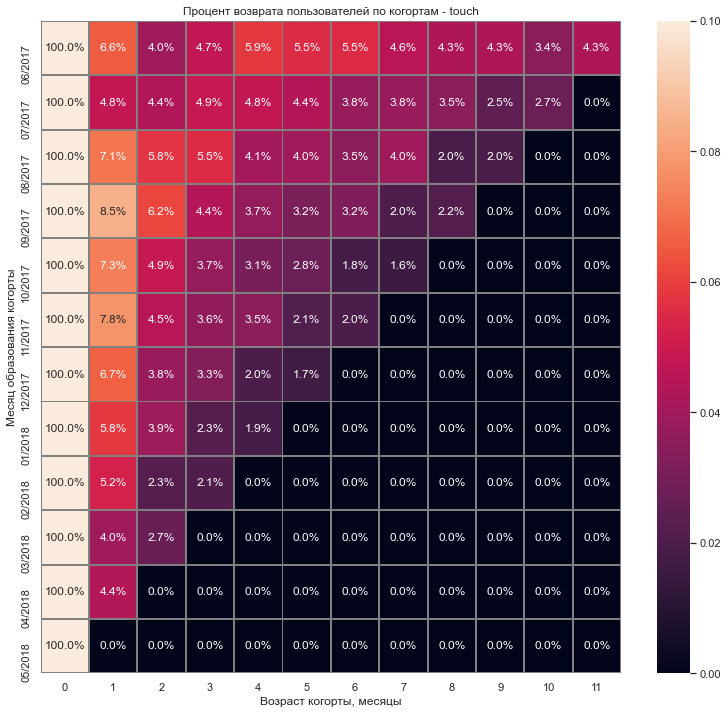

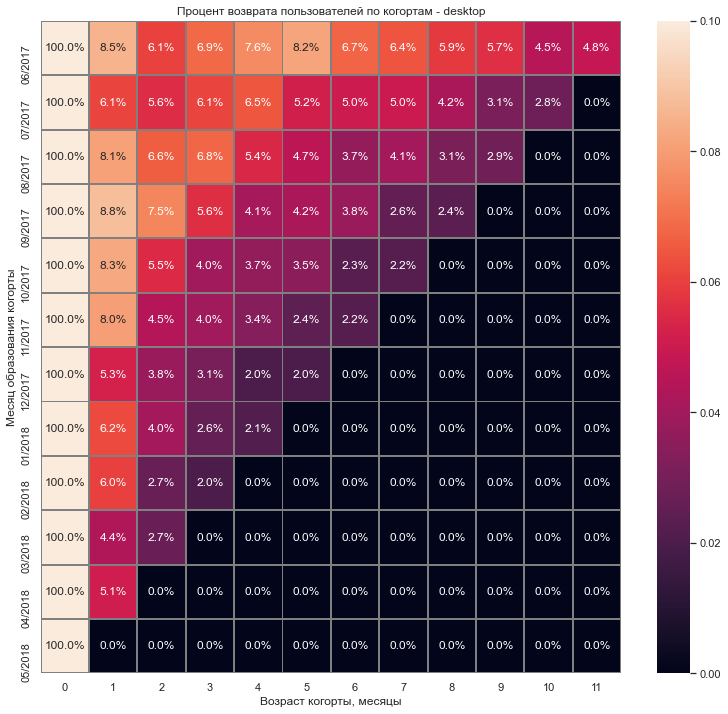

In [23]:
# Retention rate по устройствам
devices = visits['device'].unique()

print('Среднее значение процента возврата пользователей:')
for device_type in devices:
    visits_query = visits.query('device == @device_type')

   # Определим месяц первой сессии
    visits_query['first_session_month'] = visits_query['first_session_date'].astype('datetime64[M]')

# Определим время жизни когорты в месяцах
    visits_query['cohort_lifetime'] = visits_query['session_month'] - visits_query['first_session_month']
    visits_query['cohort_lifetime'] = visits_query['cohort_lifetime'] / np.timedelta64(1,'M')
    visits_query['cohort_lifetime'] = visits_query['cohort_lifetime'].round().astype('int')

#Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый месяц
    cohorts = visits_query.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

#Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждую следующую неделю.
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]

#Переименуем столбец user_id в cohort_users
    initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

# Объединим данные по когортам с исходным количеством пользователей в когорте:
    cohorts = cohorts.merge(initial_users_count,on='first_session_month')

# Наконец, рассчитаем Retention Rate. 
# Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте:
    cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

# Построим сводную таблицу и создадим тепловую карту:
    retention_pivot = cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
    retention_pivot = retention_pivot.fillna(0)
    retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

    sns.set(style='white')
    plt.figure(figsize=(13, 12))
    plt.title('Процент возврата пользователей по когортам - '+ device_type)
    sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax = 0.1);
    plt.xlabel('Возраст когорты, месяцы')
    plt.ylabel('Месяц образования когорты')
    
    # Расчет среднего значения метрики произведем по второму месяцу (период, следующий за нулевым)
    cohorts_mean = cohorts[cohorts['cohort_lifetime'] == 1]['retention'].mean()*100
    print(device_type, round(cohorts_mean, 2))


Вывод: Для touch - видим, что RR рос от июньской когорты к сентябрьской, затем падал. Для desktop - также значения снизились с 8 до 5,3, но затем наблюдался небольшой рост/колебания - есть некоторая стабилизация ситуации. Вероятно, были приняты довольно эффективные меры. В целом, RR с desktop выше, чем с touch.

### 2.2 Продажи

<b>Исследуем, когда люди начинают покупать</b>

Медиана: 1.00


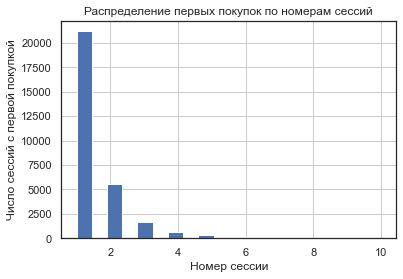

In [24]:
# Определим номера сессий
visits['num_of_session'] = visits.sort_values(['uid','start_ts'], ascending=[True,True]) \
             .groupby(['uid']) \
             .cumcount() + 1
# Объединим таблицы
orders_merged=pd.merge(orders, visits, on = 'uid')
# Выделим покупки, которые по времени попадают между началом и концом сессии
orders_true = orders_merged.query('buy_ts >= start_ts & buy_ts<=end_ts')

# Определим время первой покупки для пользователя
order_first_ts = orders_true.groupby('uid')['buy_ts'].min()
order_first_ts.name = 'order_first_ts'

# Объединим с таблицей orders_true
orders_true = orders_true.join(order_first_ts, on ='uid')

# Выделим сессии, представляющие собой первую покупку, построим гистограмму
orders_first = orders_true.query('buy_ts == order_first_ts')['num_of_session']
orders_first.hist(bins = 20, range = (1,10))
plt.title('Распределение первых покупок по номерам сессий')
plt.xlabel('Номер сессии')
plt.ylabel('Число сессий с первой покупкой')

print('Медиана: {:.2f}'.format(orders_first.median()))

In [25]:
# Определим время первой сессии для пользователя
visit_first_ts = visits.groupby('uid')['start_ts'].min()
visit_first_ts.name = 'visit_first_ts'

# Объединим с таблицей orders_true
orders_true = orders_true.join(visit_first_ts, on ='uid')

Медиана: 0.00


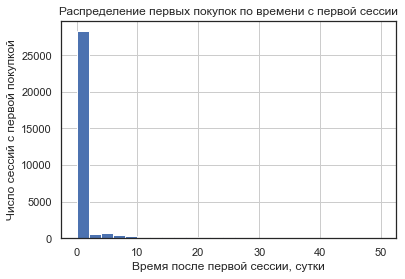

In [26]:
time_to_purchase = pd.to_timedelta(
    (orders_true['order_first_ts'] - orders_true['visit_first_ts']).dt.days, unit = 'd') / np.timedelta64(1,'D')
time_to_purchase.hist(bins = 25, range = (0,50))
plt.title('Распределение первых покупок по времени с первой сессии')
plt.xlabel('Время после первой сессии, сутки')
plt.ylabel('Число сессий с первой покупкой')

print('Медиана: {:.2f}'.format(time_to_purchase.median()))

Вывод: Видим, что пользователи чаще всего покупают в первую сессию, при этом с момента начала первой сессии до первой покупки обычно проходит не более суток.

<b>Сколько раз покупают за период?</b>

В качестве периода выберем отрезок времени 6 мес, т.к. достаточно большое число когорт имеют срок жизни больше, чем данный период, сдругой стороны период удобен для экономической оценки

In [27]:
# Добавим столбец с месяцем заказа
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
# Удалим 1 покупку в июне, т.к. она не дает информативности, но ухудшает визуализацию
orders = orders.query('buy_ts < "2018-06-01"')

# Получим месяц первой покупки каждого покупателя:
first_orders_m = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_m.columns = ['uid', 'first_order_month']

In [28]:
# Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
purchases_cohorts = pd.merge(orders,first_orders_m, on='uid')
purchases_cohorts.head(10)
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = first_orders_m.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

report = pd.merge(cohort_sizes, purchases_cohorts, on='first_order_month')

# Добавим время жизни когорты
report['cohort_lifetime'] = report['order_month'] - report['first_order_month']
report['cohort_lifetime'] = report['cohort_lifetime'] / np.timedelta64(1,'M')
report['cohort_lifetime'] = report['cohort_lifetime'].round().astype('int')

In [29]:
# Посчитаем число покупок за каждый месяц
cohort_orders = report.groupby(['first_order_month','order_month']).agg({'buy_ts': 'count'}).reset_index()
cohort_orders.columns = ['first_order_month', 'order_month','cohort_orders']

# Объединяем с таблицей
report_1 = pd.merge(cohort_orders, report, on=['first_order_month','order_month'])
report_1['cohort_orders_per_user']=report_1['cohort_orders']/report_1['n_buyers']

Число покупок за 6 месяцев: 1.44


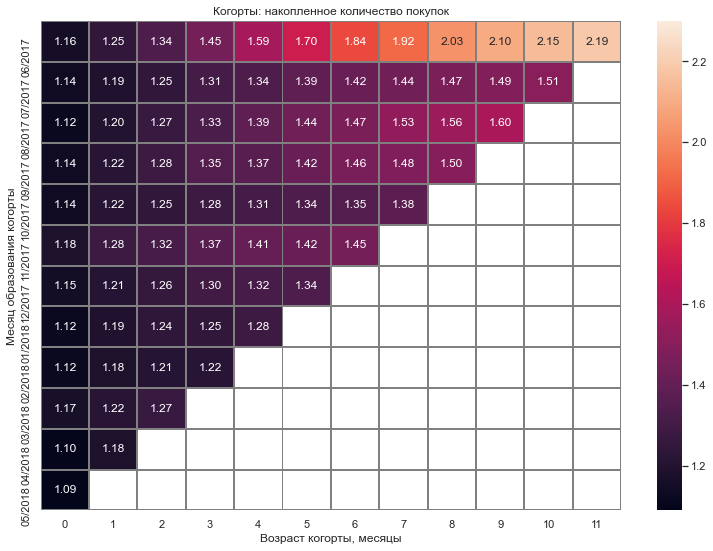

In [30]:
# Количество покупок по месяцам - сводная таблица
purchases_cohorts_pivot = report_1.pivot_table(
    index = 'first_order_month',
    columns = 'cohort_lifetime',
    values = 'cohort_orders_per_user',
    aggfunc = 'mean'
).cumsum(axis=1).round(2)


# Строим тепловую карту
purchases_cohorts_pivot.index = purchases_cohorts_pivot.index.strftime("%m/%Y")

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: накопленное количество покупок')
sns.heatmap(purchases_cohorts_pivot, annot=True, 
            fmt='.2f', linewidths=1, linecolor='gray', vmax = 2.3);
plt.xlabel('Возраст когорты, месяцы')
plt.ylabel('Месяц образования когорты')

# Среднее значение метрики
m6_purchases = purchases_cohorts_pivot.mean(axis=0)[5]
print('Число покупок за 6 месяцев: {:.2f}'.format(m6_purchases))

Вывод: За период 6 месяцев совершают в среднем 1,4 покупки. Явной тенденции по изменению числа покупок с появлением новых когорт не наблюдается.

<b>Какой средний чек?</b>

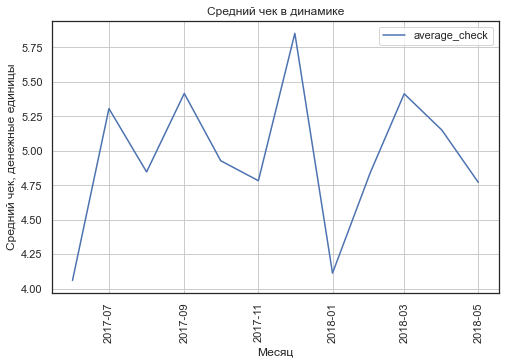

Средний чек - среднее значение метрики: 4.96 денежных единиц


In [31]:
# Сгруппируем покупки по месяцу заказа, рассчитаем сумму и число покупок, определим средний чек

average_check_data = orders.groupby('order_month').agg({'revenue':'sum', 'uid': 'count'}).reset_index()
average_check_data['average_check'] = average_check_data['revenue']/average_check_data['uid']

average_check_data['order_month']=average_check_data['order_month'].dt.date
average_check_data.plot(x = 'order_month', y = 'average_check', figsize = (8,5))
plt.title('Средний чек в динамике')
plt.xlabel('Месяц')
plt.ylabel('Средний чек, денежные единицы')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

average_check = average_check_data['average_check'].mean()
print('Средний чек - среднее значение метрики: {:.2f} денежных единиц'.format(average_check))

Вывод: Средний чек составляет 4,96 денежных единиц. Максимальное значение наблюдается в декабре, минимальные - в июне и январе.

Средний чек -  desktop 4.79
Средний чек -  touch 3.91


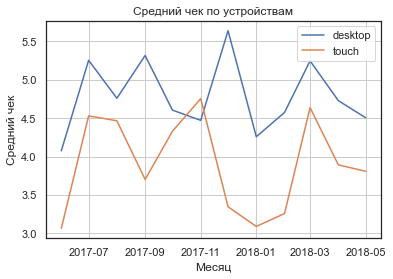

In [32]:
# Средний чек по устройствам
orders['order_date'] = pd.to_datetime(orders['buy_ts']).dt.date

# Оъединяем таблицы orders и visits
orders_1=pd.merge(orders, visits, left_on = ['uid', 'order_date'], right_on = ['uid', 'session_date']).\
   query('buy_ts >= start_ts & buy_ts <= end_ts')[['buy_ts', 'revenue', 'uid', 'device', 'source_id', 'order_date', 'order_month']]

# Группируем и считаем средний чек по устройству и месяцу
average_check_data = orders_1.groupby(['device','order_month']).agg({'revenue':'sum', 'uid': 'count'}).reset_index()
average_check_data['average_check'] = average_check_data['revenue']/average_check_data['uid']

# Строим график для каждого устройства, считаем среднее метрики
for device_type in average_check_data['device'].unique().tolist():
   
    yy = average_check_data.query('device == @device_type')
    plt.plot(yy['order_month'], yy['average_check'])
    av_check = round(yy['average_check'].mean(),2)
    print('Средний чек - ', device_type, av_check)
    
plt.title('Средний чек по устройствам')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.legend(average_check_data['device'].unique())
plt.grid()
plt.show()

Вывод: Для покупок, к которым однозначно определяется устройство: средний чек для desktop выше и составляет 4,79, а для touch - 3,91. Характер зависимостей метрики примерно совпадает, есть некоторые отличия: в сентябре для desktop высокое значение, а для touch - близкое к среднему; максимум для desktop в декабре, а для touch в ноябре.

Большая часть данных теряется, когда мы выбираем покупки, совершенные во время какой-либо сессии. 
Определим средний чек для сессий, где нельзя однозначно установить устройство, используем наиболее предпочтительное для каждого пользователя.

In [33]:
# Данные, где невозможно явно определить устройство по времени сессии
# Определим, какие устройства предпочитает каждый пользователь
visits_devices = visits.pivot_table(
    index = 'uid', columns = 'device', values = 'start_ts', aggfunc = 'count').\
    reset_index().fillna(0)[['uid', 'desktop', 'touch']]

def pref_device(df):
    """Функция для определения предпочтительного устройства для каждого пользователя"""
    df.loc[df['touch']>df['desktop'],'pref_device'] = 'touch'
    df.loc[df['touch']<df['desktop'],'pref_device'] = 'desktop'
    df.loc[df['touch']==df['desktop'],'pref_device'] = 'unknown'
    return df
# Применяем функцию, определяем наиболее часто используемое для входа устройство
visits_devices.pipe(pref_device)
pref_device = visits_devices[['uid','pref_device']]

# Объединяем таблицы
orders_22=pd.merge(orders, visits, on = 'uid').\
   query('buy_ts < start_ts | buy_ts > end_ts')[['buy_ts', 'revenue', 'uid', 'source_id', 'order_date', 'order_month']]

orders_3 = orders_22.merge(pref_device, on='uid')

Средний чек: 
desktop 8.69
touch 9.15
unknown 4.61


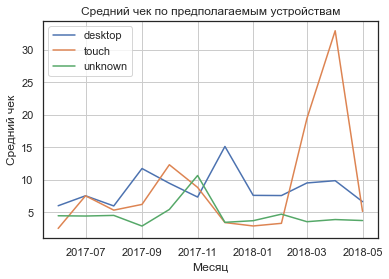

In [34]:
# Рассчитываем средний чек - для этого группируем данные по устройству и месяцу
average_check_data = orders_3.groupby(['pref_device','order_month']).agg({'revenue':'sum', 'uid': 'count'}).reset_index()
average_check_data['average_check'] = average_check_data['revenue']/average_check_data['uid']

# Выводим графики и средние значения метрик
print('Средний чек: ')
for device_type in average_check_data['pref_device'].unique().tolist():
   
    yy = average_check_data.query('pref_device == @device_type')
    plt.plot(yy['order_month'], yy['average_check'])
    av_check = round(yy['average_check'].mean(),2)
    print(device_type,av_check)
    
plt.title('Средний чек по предполагаемым устройствам')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.grid()
plt.legend(average_check_data['pref_device'].unique())
plt.show()

Вывод: Для сессий, где не можем однозначно определить устройство, а используем наиболее часто используемое пользователем - по графику зависимости в целом чек для desktop также превышает touch,  при этом наблюдается очень высокое значение для touch в апреле - более 30 денежных единиц - можно провести дополнительные исследования при наличии уточняющих данных.

<b>Сколько денег приносят? (LTV)</b>

In [35]:
# Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. 
# Сбросим индекс методом reset_index():
cohorts_ltv = report.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

# Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report_2 = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')

Средний ltv: 7.64


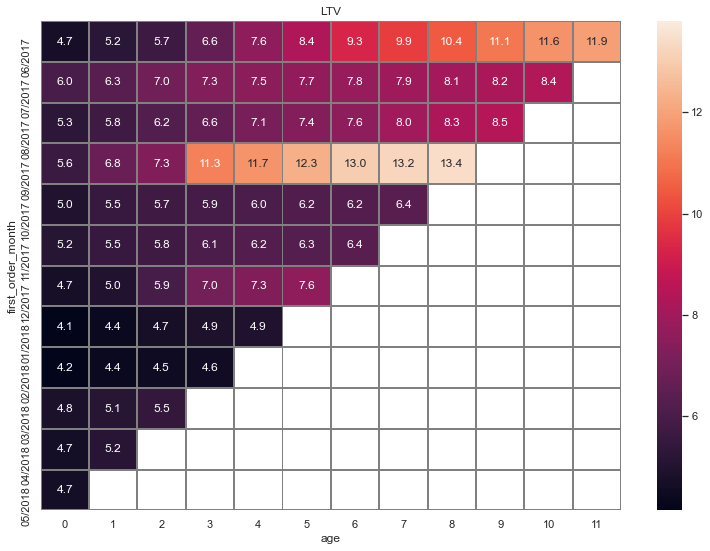

In [36]:
# LTV считают не из выручки, а из валовой прибыли. Значит, нужно найти валовую прибыль, умножив выручку на маржинальность.
# Во-вторых, LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам
margin_rate = 1
    
report_2['gp'] = report_2['revenue'] * margin_rate
report_2['age'] = (report_2['order_month'] - report_2['first_order_month']) / np.timedelta64(1, 'M')
report_2['age'] = report_2['age'].round().astype('int')


# найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. 
# Для наглядности визуализируем когорты в виде сводной таблицы:
report_2['ltv'] = report_2['gp'] / report_2['n_buyers']
    

output = report_2.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis = 1).round(2)

# Строим тепловую карту
output.index = output.index.strftime("%m/%Y")

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
plt.xlabel('Возраст когорты')
plt.ylabel('Месяц образования когорты')
sns.heatmap(output, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmax = 13.8);

# Рассчитываем среднее значение метрики
m6_ltv = output.median(axis=0)[5]
print('Средний ltv: {:.2f}'.format(m6_ltv))

Вывод: Средний ltv (медиана, т.к. есть выбивающееся значение) за полгода составляет 7,64. Можно отметить необычно высокое значение для сентябрьской когорты - 12,3, а самые низкие - у октябрьской и декабрьской - 6,2-6,3.

### 2.3 Маркетинг

<b>Сколько денег потратили? Всего / на каждый источник / по времени </b>


Суммарные расходы: 329131.62


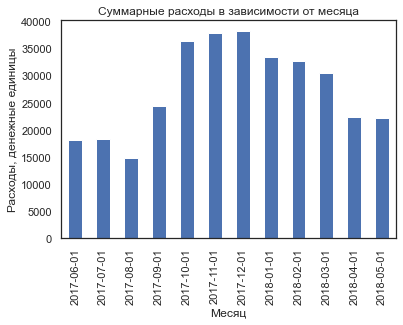

In [37]:
# считаем расходы за месяц - группируем по месяцам, суммируем расходы
costs['month'] = costs['dt'].astype('datetime64[M]')

monthly_costs = costs.groupby('month').sum().reset_index()

# Строим график зависимости суммарных расходов от месяца, изменим формат даты для удобства отображения на графике
monthly_costs['month'] = monthly_costs['month'].dt.date
monthly_costs.reset_index().plot.bar(x = 'month', y='costs', legend = None)
plt.ylabel('Расходы, денежные единицы')
plt.xlabel('Месяц')
plt.title('Суммарные расходы в зависимости от месяца')
print('Суммарные расходы: {:.2f}'.format(monthly_costs['costs'].sum()))


Вывод: суммарные расходы составили 329 тыс. Наибольшие расходы - в октябре, ноябре, декабре (около 35 тыс/месяц), а наименьшие - в августе, июне, июле (15-17 тыс/месяц).

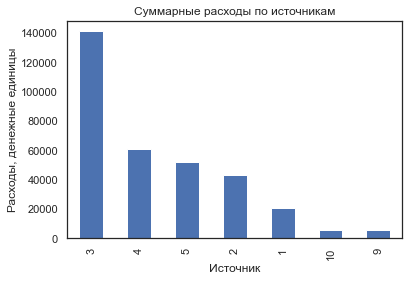

In [38]:
# Рассчитаем расходы по источникам путем соответствующей группировки данных
sources_costs = costs.groupby('source_id').sum().sort_values(by = 'costs', ascending = False).reset_index()

# Отобразим графически
sources_costs.plot.bar(x = 'source_id', y='costs', legend = None)
plt.ylabel('Расходы, денежные единицы')
plt.xlabel('Источник')
plt.title('Суммарные расходы по источникам')
plt.show()

Вывод: наибольшие расходы - на источник 3 ( 141 тыс), наименьшие - на 9 и 10 (5,5 - 5,8 тыс).

<b>Сколько стоило привлечение одного покупателя из каждого источника?</b>

<b>Насколько окупились расходы? (ROI)</b>

In [39]:
# Посчитаем LTV, CAC, ROMI с разбивкой по источникам 

# Определим источник, из которого привлечен покупатель (по первому входу)
uid_source = visits[['uid', 'source_id', 'start_ts']].sort_values(by='start_ts').groupby('uid')['source_id'].first()

# Объединим с таблицей заказов
orders_1 = orders.merge(uid_source, on = 'uid')

In [40]:
# Сформируем когорты
## Определяем месяц первой покупки
first_orders = orders_1.groupby([ 'source_id','uid']).agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['source_id','uid', 'first_order_month']
## Определяем размеры когорт
cohort_sizes = first_orders.groupby(['source_id','first_order_month', ]).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = [ 'source_id' ,'first_order_month','n_buyers']

# Объединим данные и уберем одну покупку за июнь
orders_first_month = pd.merge(orders_1,first_orders, on=['source_id', 'uid']).query('first_order_month <"2018-06-01"')

In [41]:
# Группируем данные по источнику, считаем доходы для каждой когорты и каждого месяца
cohorts = orders_first_month.groupby(['source_id','first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on=['first_order_month', 'source_id'])

# Примем маржинальность
margin_rate = 1
# Тогда 
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

In [42]:
# Расситаем затраты на каждый источник по месяцам
monthly_costs = costs.groupby(['source_id','month']).sum()

# Объединим с таблицей report
report_new = pd.merge(report, monthly_costs, left_on=['source_id','first_order_month'], right_on=['source_id','month'])
# Рассчитаем САС и ROMI
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']


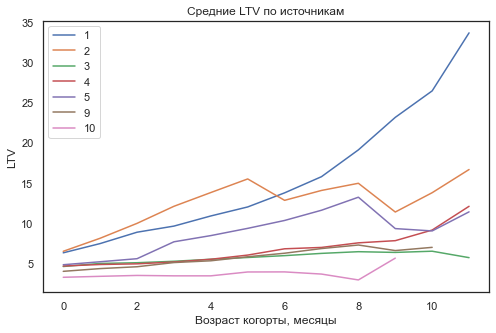

In [43]:
# Найдем средние значения ltv и отобразим на графике

m9_ltv_s = []# для расчета среднего значения Ltv за 9 мес
m12_ltv_s = []# для расчета среднего значения Ltv за 12 мес

plt.figure(figsize = (8,5))

for source_type in report_new['source_id'].unique():# перебираем источники, формируем срез и сводную таблицу, строим график
    
    result = report_new.query('source_id == @source_type').pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis = 1).mean(axis = 0).round(2).reset_index()
    
    m9_ltv_s.append(result[0][8])
    
    try:
        m12_ltv_s.append(result[0][11])# Поскольку некоторые источники не имеют когорт с возрастом 12 мес
    except: m12_ltv_s.append(0)
        
    plt.plot(result['age'], result[0])
    
plt.legend(report_new['source_id'].unique())
plt.title('Средние LTV по источникам')   
plt.ylabel('LTV')
plt.xlabel('Возраст когорты, месяцы')
plt.show()

In [42]:
# Средние значения Ltv за 9 И 12 мес по источникам   
m9_ltv_sources = pd.DataFrame(m9_ltv_s,
     index=report_new['source_id'].unique(), columns = ['ltv'])
display('LTV за 9 месяцев: ',m9_ltv_sources.sort_values(by = 'ltv', ascending = False))

m12_ltv_sources = pd.DataFrame(m12_ltv_s,
     index=report_new['source_id'].unique(), columns = ['ltv'])
display('LTV за год',m12_ltv_sources.sort_values(by = 'ltv', ascending = False))

'LTV за 9 месяцев: '

,ltv
1,19.10
2,14.95
5,13.22
4,7.55
9,7.28
3,6.45
10,2.94


'LTV за год'

,ltv
1,33.64
2,16.66
4,12.09
5,11.40
3,5.71
9,0.00
10,0.00


Вывод: При анализе за 9 месяцев (есть данные для всех источников) - наибольший ltv у источников 1 (19,10), 2 (14,95) и 5(13,22), наименьший - у 10 (2,94). Остальные источники дают ltv  в диапазоне 6,45- 7,55. За год - не все источники используются такое время - максимальный ltv у источника 1 (33,64), минимальный - у источника 3 (5,71).
Источник 1 показывает наибольший, непрерывный рост ltv за весь исследуемый год. 

'Средние САС'

,cac
3,13.98
2,12.29
4,7.35
5,7.03
1,6.96
10,5.14
9,4.97


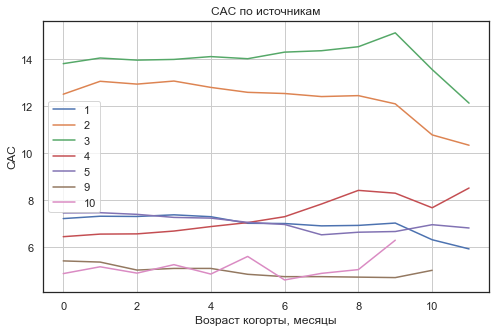

In [44]:
# Найдем средние значения cac и отобразим на графике
cac_source = []

plt.figure(figsize = (8,5))
for source_type in report_new['source_id'].unique():
    
    result = report_new.query('source_id == @source_type').pivot_table(
        index='first_order_month', 
        columns='age', 
        values='cac', 
        aggfunc='mean').mean(axis = 0).round(2).reset_index()
    
    cac_source.append(round(result[0].mean(),2))
    plt.plot(result['age'], result[0])
    
cac_sources = pd.DataFrame(cac_source,
     index=report_new['source_id'].unique(), columns = ['cac'])
display('Средние САС',cac_sources.sort_values(by = 'cac', ascending = False))    
   
plt.legend(report_new['source_id'].unique())
plt.title('CAC по источникам')
plt.ylabel('САС')
plt.xlabel('Возраст когорты, месяцы')
plt.grid()
plt.show()

Вывод: Наибольший САС из источников имеют источник 3 (в среднем 13,98) и 2 (12,29). Наименьший САС - у источников 9 (4,97) и 10 (5,14). Динамика изменения САС источников в целом: снижается - у 2,3,1,5,9; растет - у 4,10.

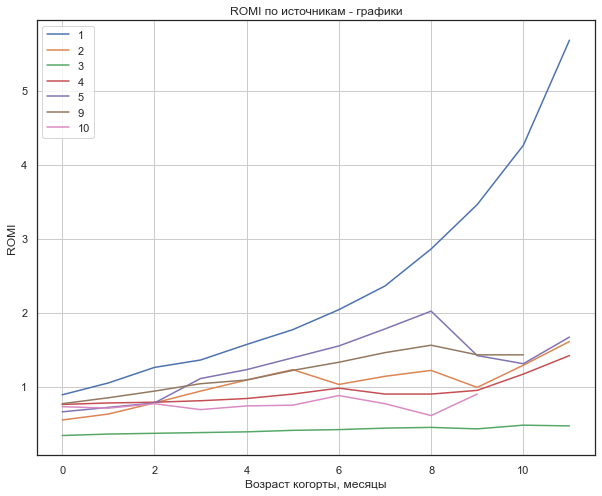

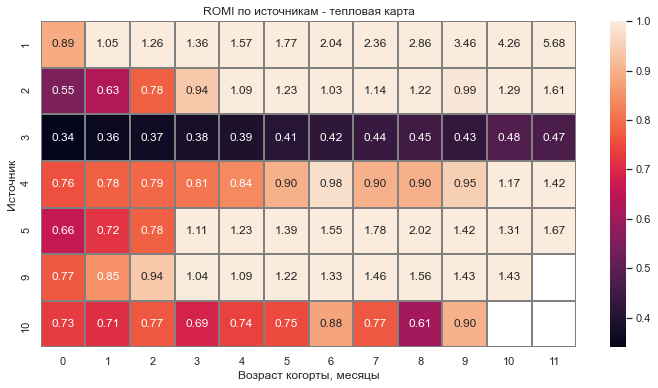

In [45]:
# Найдем средние значения romi и отобразим на графике
romi_df = pd.DataFrame()

plt.figure(figsize = (10,8))

for source_type in report_new['source_id'].unique():
    
    result = report_new.query('source_id == @source_type').pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis = 1).mean(axis = 0).round(2)
    romi_df[source_type] = result
    result = result.reset_index()
    plt.plot(result['age'], result[0])
     

plt.legend(report_new['source_id'].unique())
plt.title('ROMI по источникам - графики')
plt.xlabel('Возраст когорты, месяцы')
plt.ylabel('ROMI')
plt.grid()
plt.show()

romi_df = romi_df.T
sns.set(style='white')
plt.figure(figsize=(12, 6))
plt.title('ROMI по источникам - тепловая карта')
sns.heatmap(romi_df, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax = 1);
plt.xlabel('Возраст когорты, месяцы')
plt.ylabel('Источник')
plt.show()


Вывод: Источник 1 окупился ко 2-му месяцу, 5 и 9 - к четвертому, источник 2 - к пятому, источник 4 - к 10-му. Источник 3 далек от окупаемости. Источник 10, вероятно, окупится в ближайшие месяцы, хотя динамика неоднозначная - наблюдаются скачкообразные изменения.

# Вывод:

<b>Платформы:</b>

В данный момент наиболее привлекательной платформой является desktop:

По временным метрикам (DAU, WAU, MAU) количество пользователей с desktop более, чем в 2 раза превышает количество пользователей с touch.

Можно отметить, что с каждой новой когортой поведение покупателей меняется - падает коэффициент удержания: например, во 2-й месяц жизни когорты для июньской 2017 г. он составляет 7,9, а для мартовской 2018-го - 4,8, т.е. упал в 1,6 раза, причем спад начинается с ноября. Нужно проанализировать эффективность источников траффика, службы поддержки, какие были изменения в интерфейсе и т.д. Среднее значение коэффициента возврата по 2-му месяцу жизни когорты - 6,5. При этом для desktop после спада отмечена стабилизация Retention Rate - вероятно, были приняты довольно эффективные меры. В целом, Retention Rate с desktop выше, чем с touch.

Для покупок, к которым однозначно определяется устройство: средний чек для desktop выше и составляет 4,79, а для touch - 3,91. 
Для сессий, где не можем однозначно определить устройство, а классифицируем по наиболее часто используемому пользователм устройству - по графику зависимости в целом чек для desktop также превышает touch,  при этом наблюдается очень высокое значение для touch в апреле - более 30 денежных единиц - можно провести дополнительные исследования, уточнить, чем обусловлены такие высокие значения.


<b>Источники:</b>

Выявлено следующее:

1) Быстро окупился (ко 2-му месяцу); самый высокий ltv (33,64 ден ед за год), причем рост непрерывный и быстрый; число привлекаемых пользователей - невысокое (MAU 1,8 тыс); расходы также средние (сас 6,96) и снижаются;

2) привлечение пользователей среднее (MAU 2,7 тыс), один из самых высоких ltv - 16.66 за год, окупился к 5-му месяцу, средний сас высокий 	12.29, но снижается;

3) один из лучших по числу привлекаемых клиентов (MAU 6,7 тыс), но самые высокие расходы (141 тыс), за год минимальный ltv (5,71 ден ед за год), имеет наибольшую сас (13,98), за год окупаемость на уровне 50%

4) привлекает наибольшее число пользователей (MAU 7,7 тыс), довольно высокий ltv - 12.09 за год, САС не очень высокий - 7.35, но растет, окупился к 10-му месяцу

5) привлекает большое число пользователей (MAU 5 тыс), довольно высокий ltv  - 11.40 за год, САС  не очень высокий 7.03, окупился к 4-му месяцу,

9) низкое число привлеченных пользователей (MAU 1 тыс), наименьшие расходы (САС 5,5), окупился к 4-му месяцу, 	Ltv за 9 месяцев довольно высокий - 7.28,

10) низкое число привлеченных пользователей (MAU 0,7 тыс), наименьшие расходы (САС 5,8), за 11 месяцев не окупился, динамика неоднозначная, LTV за 9 месяцев самое низкое - 2,94

Таким образом, можно выделить:

<b>рекомендованные источники:</b>  

1 - как самый быстро растущий по LTV и быстро окупившийся,  

2, 5 - достаточно быстро окупились, довольно высокий LTV и невысокий или снижающийся САС,  

4 - как привлекающий наибольшее число новых пользователей, но нужно обратить внимание, что САС растет, и это замедляет окупаемость и доход,  

9 - быстро окупился, довольно высокий LTV, расходы наименьшие, видно, что источник используется менее года, но является перспективным, нужно наблюдать, будет ли рост числа привлеченных клиентов, пока это число невелико  


<b>неэффективные источники:</b>  

3 - необходимо оптимизировать расходы на источник 3, т.к. он один из лучших по числу привлекаемых покупателей, но не окупается, в противном случае - отказаться от него, как от убыточного,  

10 - динамика неоднозначная, скачкообразная, за 11 месяцев не окупился и привлекает мало пользователей, считаю непривлекательным;  

6, 7 - ошибка в данных или источники совсем не эффективные, число привлеченных пользователей 1-2, расчет метрик не осуществлялся.

